

```
# This is formatted as code
```
https://towardsdatascience.com/@nik.piepenbreier
We’ll be using data from this wonderful Github repository that auto-updates the data daily. We’ll load our data into a Pandas’ dataframe based on the URL so that it’ll update automatically for us every day.

4.4.1


Text(2020-01-23 00:00:00, -500, 'For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths')

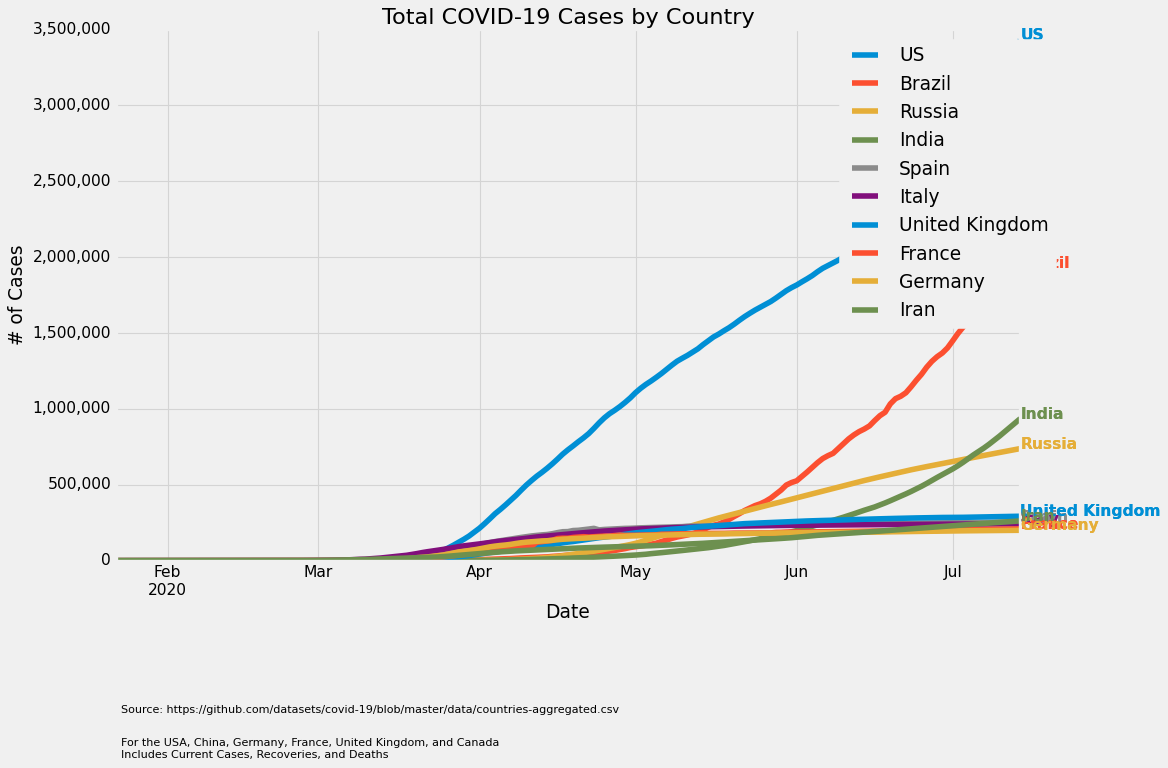

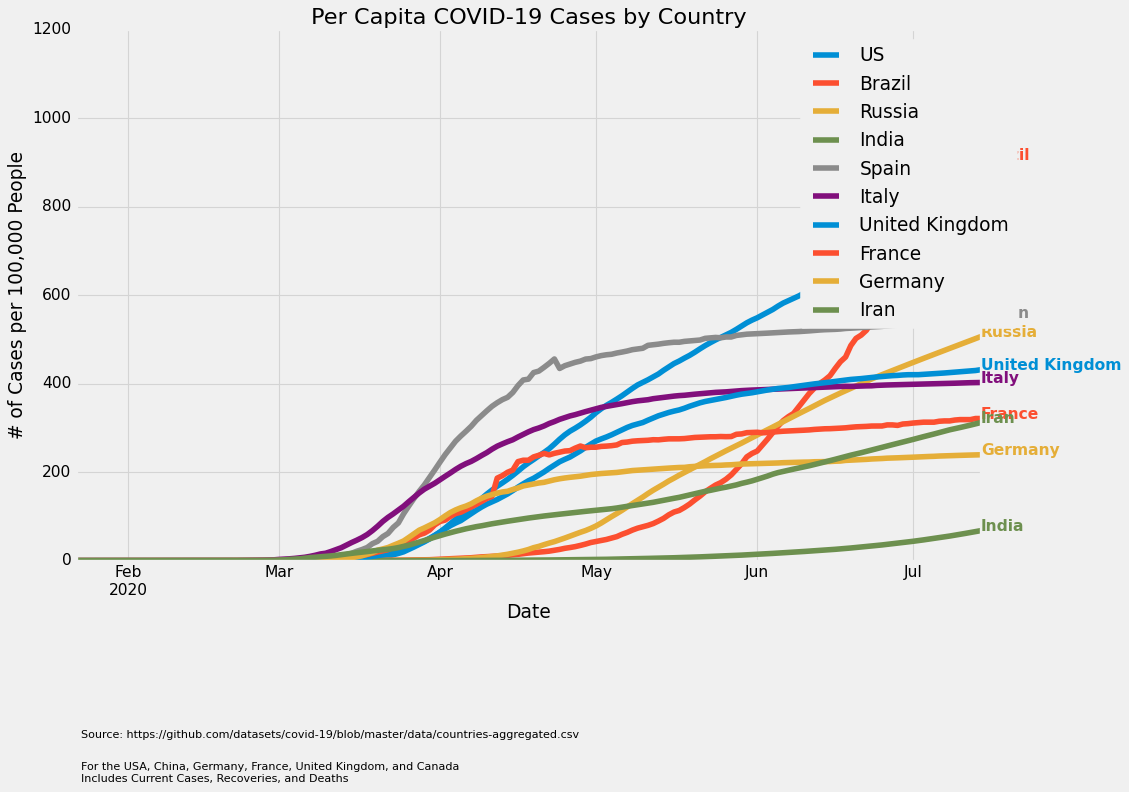

In [70]:
!pip install -q plotly
!pip install -q cufflinks
!pip install -q chart_studio
import plotly
plotly.io.renderers.default = 'colab'
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot #Allow plotly work offline
import cufflinks as cf
cf.go_offline()
print(__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)

# Section 1 - Loading our Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import numpy as np


# Section 2 - Loading and Selecting Data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
#df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

countries = list((pd.pivot_table(df,index='Date', columns='Country', values='Confirmed',aggfunc='sum')).sum().nlargest(10).keys())
df = df[df['Country'].isin(countries)]

# Section 3 - Creating a Summary Column
#df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

# Section 4 - Restructuring our Data
covid = df.pivot(index='Date', columns='Country', values='Confirmed')
covid = covid[list(covid.sum(axis=0).sort_values(ascending=False).keys())] #Rearrange the dataframe collumns by the descending total cases 

#Extract top 10 countries with the most cases 
keys=list(covid.sum(axis=0).sort_values(ascending=False).keys())  

plt.style.use('fivethirtyeight')

# Section 7 - Creating the Visualization
plot = covid.plot(kind='line',figsize=(13,8), linewidth=5, legend=True, label='Inline label')
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')
plot.legend(bbox_to_anchor=(1.05, 1))
plot.set_title( "Total COVID-19 Cases by Country", fontdict=None, loc='center')

plot.text(x = covid.index[1], y = -1000000,s = 'Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)
plot.text(x = covid.index[1], y = -1300000,s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 10)

# Section 6 - Generating Colours and Style
values = []
for i in range(0,10):
  values.append(plot.get_lines()[i].get_color())

colors = {} 
for key in keys: 
    for value in values: 
        colors[key] = value 
        values.remove(value) 
        break  

for country in countries:
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')


# Section 8 - Assigning Colour
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')


# Section 9 scrap the population data from web 
import requests
from bs4 import BeautifulSoup
def getpop(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    target = soup.find(
        "div", class_="col-md-8 country-pop-description").find_all_next("strong")[1]
    return int(target.text.replace(',', ''))

populations = {} 

for key in keys: 
  if key == "US":
    url = "https://www.worldometers.info/world-population/us-population/"
  elif key =="United Kingdom":
    url = "https://www.worldometers.info/world-population/uk-population/"
  else:
    url = "https://www.worldometers.info/world-population/"+key.lower()+"-population/"
  pop = getpop(url)
  populations[key]=[pop]


# Section 10 - Calculating Rates per 100,000

percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000

percapitaplot = percapita.plot(kind='line',figsize=(13,8), linewidth=5, legend=True, label='Inline label')
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')
percapitaplot.legend(bbox_to_anchor=(1.05, 1))
#plt.suptitle('Per Capita COVID-19 Cases by Country', fontsize = 23, weight = 'bold',va= 'bottom')
percapitaplot.set_title( "Per Capita COVID-19 Cases by Country", fontdict=None, loc='center')



percapitaplot.text(x = percapita.index[1], y = -400,s = 'Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)
percapitaplot.text(x = percapita.index[1], y = -500,s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 10)



https://opensource.com/article/20/4/python-map-covid-19

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import string

!pip install -q plotly
!pip install -q cufflinks
!pip install -q chart_studio
import plotly
plotly.io.renderers.default = 'colab'
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot #Allow plotly work offline
import cufflinks as cf
cf.go_offline()
print(__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)

# Section 1 - Loading our Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import numpy as np




# Section 2 - Loading and Selecting Data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
#df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

countries = list((pd.pivot_table(df,index='Date', columns='Country', values='Confirmed',aggfunc='sum')).sum().nlargest(15).keys())
df = df[df['Country'].isin(countries)]

# Section 3 - Creating a Summary Column
#df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

# Section 4 - Restructuring our Data
covid = df.pivot(index='Date', columns='Country', values='Confirmed')
covid = covid[list(covid.sum(axis=0).sort_values(ascending=False).keys())] #Rearrange the dataframe collumns by the descending total cases 

covid1=covid.sum(axis = 1).to_frame(name="Total_Cases")
covid1['Month']=pd.DatetimeIndex(covid1.index).month
covid1=covid1.groupby(['Month']).sum().reset_index()
covid1['Cumulative_Sum'] = covid1['Total_Cases'].cumsum()

x = np.linspace(0, 5, 11)
y = x ** 2

fig = plt.figure(figsize=(24,20),facecolor='w')

# ax1: Total confirmed cases globally
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.bar(covid1['Month'],covid1['Cumulative_Sum'])
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_title("Total confirmed cases globally")
ax1.set_ylim(0, 600000000)
ax1.set_xlabel('Months')
ax1.set_ylabel('Number of Cases')
ax1.grid()
for x, y in zip(covid1['Month'],covid1['Cumulative_Sum']):
  label = "{:.2f}".format(y)
  ax1.annotate(label, # this is the text
               (x,y), # this is the point to label
               textcoords="offset points", # how to position the text
               xytext=(0,10), # distance from text to points (x,y)
               ha='center') # horizontal alignment can be left, right or center

  #ax1.text(covid.sum(axis = 1).index[-1],covid.sum(axis = 1).max()-1 , "  {} people".format(covid.sum(axis = 1).max()))

#ax2: Total confirmed cases by country
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)

  #Extract top 15 countries with the most cases 
keys=list(covid.sum(axis=0).sort_values(ascending=False).keys())  

  # Section 7 - Creating the Visualization

random_color=['black','green','red','red','red','red','red','red','red','red','red','red','red','red','red']

ax2.plot(covid, linewidth=5,color=random_color)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax2.grid(color='#d4d4d4')
ax2.set_xlabel('Date')
ax2.set_ylabel('# of Cases')
ax2.set_title( "Total COVID-19 Cases by Country", fontdict=None, loc='center')


# Section 6 - Generating Colours and Style
values = []
for i in range(0,15):
  values.append(ax2.get_lines()[i].get_color())

colors = {} 
for key in keys: 
    for value in values: 
        colors[key] = value 
        values.remove(value) 
        break  

for country in countries:
    ax2.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

# Section 8 - Assigning Colour
for country in list(colors.keys()):
    ax2.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')




#ax3: _____________________________________________________________________
ax3 = plt.subplot2grid((3,3), (2,0), colspan=2)


  # Section 9 scrap the population data from web 
import requests
from bs4 import BeautifulSoup
def getpop(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    target = soup.find(
        "div", class_="col-md-8 country-pop-description").find_all_next("strong")[1]
    return int(target.text.replace(',', ''))

populations = {} 

for key in keys: 
  if key == "US":
    url = "https://www.worldometers.info/world-population/us-population/"
  elif key =="United Kingdom":
    url = "https://www.worldometers.info/world-population/uk-population/"
  else:
    url = "https://www.worldometers.info/world-population/"+key.lower()+"-population/"
  pop = getpop(url)
  populations[key]=[pop]


  # Section 10 - Calculating Rates per 100,000

percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000


ax3.plot(percapita, linewidth=5)
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax3.grid(color='#d4d4d4')
ax3.set_xlabel('Date')
ax3.set_ylabel('# of Cases per 100,000 People')
ax3.set_title( "Per Capita COVID-19 Cases by Country", fontdict=None, loc='center')


for country in list(colors.keys()):
    ax3.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')




#ax4: Stacked bar char of top 15 coutries with most cases 

ax4 = plt.subplot2grid((3,3), (1,2), rowspan=2)

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])

df2 = df.pivot(index='Date', columns='Country', values='Confirmed')
df2.groupby(by=df2.index.month).sum()
df2=df2[list(df2.sum(axis=0).sort_values(ascending=False).keys())]
df2=df2.resample('M').sum()
percentage = df2.div(df2.sum(axis=1), axis=0)
percentage2=percentage.iloc[:, 0:15]
percentage2['others']=percentage.iloc[:, 15:-1].sum(axis=1)



a = percentage2.iloc[:,0]
bottom = []
bottom.append(a)
for i in range(1,16):
  a = a + percentage2.iloc[:,i]
  bottom.append(a)

ax4.bar(list(percentage2.index.month),percentage2.iloc[:,0])

for i in range(1,16):
  ax4.bar(list(percentage2.index.month),percentage2.iloc[:,i], bottom = bottom[i-1])
ax4.legend()

fig.tight_layout()



4.4.1


No handles with labels found to put in legend.


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa246af6ae8> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 1920x1600 with 4 Axes>

In [74]:
covid1

Month  Total_Cases  Cumulative_Sum
0      1        38102           38102
1      2      1641258         1679360
2      3      7518317         9197677
3      4     51095827        60293504
4      5    113470328       173763832
5      6    185469334       359233166
6      7    123325981       482559147

In [69]:
import random

rand_colors=[]
for i in range(0,15):
  r = lambda: random.randint(0,255)
  rand_colors.append(r)

#9CC2B7


No handles with labels found to put in legend.


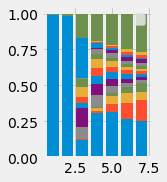

In [24]:
ax4 = plt.subplot2grid((3,3), (1,2), rowspan=2)

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])

df2 = df.pivot(index='Date', columns='Country', values='Confirmed')
df2.groupby(by=df2.index.month).sum()
df2=df2[list(df2.sum(axis=0).sort_values(ascending=False).keys())]
df2=df2.resample('M').sum()
percentage = df2.div(df2.sum(axis=1), axis=0)
percentage2=percentage.iloc[:, 0:15]
percentage2['others']=percentage.iloc[:, 15:-1].sum(axis=1)


ind = np.array(percentage2.index.month)

a = percentage2.iloc[:,0]
bottom = []
bottom.append(a)
for i in range(1,16):
  a = a + percentage2.iloc[:,i]
  bottom.append(a)

ax4.bar(ind,percentage2.iloc[:,0])

for i in range(1,16):
  ax4.bar(ind,percentage2.iloc[:,i], bottom = bottom[i-1])

ax4.legend()

In [60]:
import string

rand_colors =[]
for i in range(0,16):  
  rand_colors.append(list(string.ascii_lowercase)[i])
  print(list(string.ascii_lowercase)[i])


a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p


In [58]:
list(string.ascii_lowercase)[0]

'a'

In [6]:
for country in list(colors.keys()):
    ax2.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

In [7]:
percentage2.columns

!pip install -q pycountry
import pycountry
import plotly.express as px
import pandas as pd
# ----------- Step 1 ------------
URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df1 = pd.read_csv(URL_DATASET)
# print(df1.head) # Uncomment to see what the dataframe is like
# ----------- Step 2 ------------
list_countries = df1['Country'].unique().tolist()
# print(list_countries) # Uncomment to see list of countries
d_country_code = {}  # To hold the country names and their ISO
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        # country_data is a list of objects of class pycountry.db.Country
        # The first item  ie at index 0 of list is best fit
        # object of class Country have an alpha_3 attribute
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        # If could not find country, make ISO code ' '
        d_country_code.update({country: ' '})

# print(d_country_code) # Uncomment to check dictionary  

# create a new column iso_alpha in the df
# and fill it with appropriate iso 3 code
for k, v in d_country_code.items():
    df1.loc[(df1.Country == k), 'iso_alpha'] = v

# print(df1.head)  # Uncomment to confirm that ISO codes added
# ----------- Step 3 ------------
fig = px.choropleth(data_frame = df1, 
                    locations= "iso_alpha",
                    color= "Confirmed",  # value in column 'Confirmed' determines color
                    hover_name= "Country",
                    color_continuous_scale= 'RdYlGn',  #  color scale red, yellow green
                    animation_frame= "Date")

fig.show()


could not add ISO 3 code for -> Burma
could not add ISO 3 code for -> Congo (Brazzaville)
could not add ISO 3 code for -> Congo (Kinshasa)
could not add ISO 3 code for -> Diamond Princess
could not add ISO 3 code for -> Korea, South
could not add ISO 3 code for -> Laos
could not add ISO 3 code for -> MS Zaandam
could not add ISO 3 code for -> Taiwan*
could not add ISO 3 code for -> West Bank and Gaza
